# Analysing Shakespeare

In this exercise, we will analyse Shakepeare using our new knowledge on text miming.

In [1]:
# download shakespeare

import requests

URL = "https://www.gutenberg.org/cache/epub/100/pg100.txt"
page = requests.get(URL)

# print(len(page.text))

text = page.text

In [2]:
# the text can be split into several documents using \r\n\r\n\r\n in regex
# these newlines seperate each document

shakespeare = text.split("\r\n\r\n\r\n ")

In [3]:
# the second split is the first story
shakespeare[1]

"                    1\r\n  From fairest creatures we desire increase,\r\n  That thereby beauty's rose might never die,\r\n  But as the riper should by time decease,\r\n  His tender heir might bear his memory:\r\n  But thou contracted to thine own bright eyes,\r\n  Feed'st thy light's flame with self-substantial fuel,\r\n  Making a famine where abundance lies,\r\n  Thy self thy foe, to thy sweet self too cruel:\r\n  Thou that art now the world's fresh ornament,\r\n  And only herald to the gaudy spring,\r\n  Within thine own bud buriest thy content,\r\n  And tender churl mak'st waste in niggarding:\r\n    Pity the world, or else this glutton be,\r\n    To eat the world's due, by the grave and thee."

In [4]:
# convert it to a dataframe
import pandas as pd

df = pd.DataFrame(shakespeare[1:155])
df

,0
0,1\r\n From fairest creatu...
1,2\r\n When forty winters ...
2,3\r\n Look in thy glass a...
3,4\r\n Unthrifty lovelines...
4,5\r\n Those hours that wi...
...,...
149,150\r\n O from what power...
150,151\r\n Love is too young...
151,152\r\n In loving thee th...
152,153\r\n Cupid laid by his...


Finally, let's create a Shakespeare corpus and investigate the first 5 documents in it.

In [5]:
import numpy as np 

shakespeare_five = df.iloc[1:6]
shakespeare_five.describe()

,0
count,5
unique,5
top,6\r\n Then let not winter...
freq,1


Next, we apply our usual text transformations to clean the text, using the Corpuser function:

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords = list(stopwords.words('english'))

def Corpuser(corpus):
    corpus = word_tokenize(corpus)
    corpus = [word.replace(" ", "") for word in corpus]
    corpus = [word.lower() for word in corpus if word.isalpha()]

    corpus = [word for word in corpus if word not in stopwords]
    
    return corpus

Create the DocumentTermMatrix:

In [7]:
# then we create a frequency table

docs = shakespeare[1:155]
def frequencytable(corpus):
    words = Corpuser(corpus)
    freq_table = {}
    for word in words:
        if word in freq_table:
            freq_table[word] += 1
        else:
            freq_table[word] = 1
    return freq_table

ft = frequencytable(str(docs))

In [8]:
def dtm(documents):
    dfs = []
    for i in range(len(documents)):
        table = frequencytable(str(documents[i]))
        i = pd.DataFrame.from_dict(table, orient='index', columns={i})
        dfs.append(i)
    dtm = pd.concat(dfs, axis=1)
    dtm = dtm.fillna(0)
    
    return dtm

In [9]:
shakespeare_dtm = dtm(docs)

In [10]:
shakespeare_dtm

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
fairest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
creatures,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
desire,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
increase,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thereby,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
helena,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
gentlewoman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
protected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
diana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Let's have a closer look at the first 10 docs

In [11]:
doc10 = shakespeare[1:11]
ft = frequencytable(str(doc10))
dtm_10 = dtm(doc10)

In [12]:
dtm_10

,0,1,2,3,4,5,6,7,8,9
fairest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
creatures,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
desire,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
increase,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thereby,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
fairer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
lodged,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
presence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
kind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


There are many many empty entries (0), which means the words do not appear in the document. We can for example use only the 10 most occuring terms

In [13]:
def top_n_terms(freqtab, n):
    sorted_ft = sorted(freqtab.items(), key=lambda x: x[1], reverse=True)
    freqtab = sorted_ft[:n]  
    terms = [tup[0] for tup in freqtab]
    return terms

In [14]:
# def dtm_10(documents):
#     dfs = []
#     for i in range(len(documents)):
#         table = frequencytable(str(documents[i]))
#         i = pd.DataFrame.from_dict(table, orient='index', columns={i})
#         dfs.append(i)
#     dfs
#     dtm = pd.concat(dfs, axis=1)
#     dtm = dtm.fillna(0)
    
#     return dtm

In [15]:
top10 = top_n_terms(ft, 10)
top10

['thou',
 'thy',
 'thee',
 'beauty',
 'self',
 'thine',
 'world',
 'art',
 'sweet',
 'another']

In [16]:
dtm_top10 = dtm_10[dtm_10.index.isin(top10)]

In [17]:
dtm_top10

,0,1,2,3,4,5,6,7,8,9
beauty,1.0,4.0,0.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0
thou,2.0,3.0,6.0,5.0,0.0,5.0,2.0,4.0,3.0,6.0
thine,2.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0
thy,5.0,7.0,4.0,6.0,0.0,3.0,2.0,0.0,2.0,6.0
self,2.0,0.0,0.0,4.0,0.0,2.0,1.0,0.0,1.0,4.0
sweet,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
art,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
world,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
thee,1.0,0.0,2.0,3.0,0.0,4.0,0.0,2.0,2.0,2.0
another,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


Better, much better ...


Let's find the 50 most frequent terms in Shakespeare next.

In [18]:
top50 = top_n_terms(ft, 50)
top50

['thou',
 'thy',
 'thee',
 'beauty',
 'self',
 'thine',
 'world',
 'art',
 'sweet',
 'another',
 'dost',
 'doth',
 'still',
 'ten',
 'one',
 'eyes',
 'make',
 'love',
 'die',
 'time',
 'shall',
 'treasure',
 'shame',
 'fair',
 'look',
 'glass',
 'whose',
 'age',
 'live',
 'single',
 'every',
 'summer',
 'winter',
 'times',
 'widow',
 'may',
 'desire',
 'might',
 'tender',
 'heir',
 'bear',
 'lies',
 'fresh',
 'within',
 'waste',
 'else',
 'deep',
 'youth',
 'lusty',
 'much']

## TF/IDF

We have discussed the tf/idf scoring for documents in the lecture. 

In python, tf/idf is easy to create using scikit learn. 

In [19]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
vec = tfidf.fit_transform(doc10)
 
matrix = pd.DataFrame(vec.toarray().transpose(), index=tfidf.get_feature_names())
 
matrix

,0,1,2,3,4,5,6,7,8,9
10,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.095221
abundance,0.104773,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
abuse,0.000000,0.000000,0.000000,0.101153,0.0,0.000000,0.000000,0.0,0.0,0.000000
acceptable,0.000000,0.000000,0.000000,0.101153,0.0,0.000000,0.000000,0.0,0.0,0.000000
adore,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.098791,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
worms,0.000000,0.000000,0.000000,0.000000,0.0,0.089725,0.000000,0.0,0.0,0.000000
worth,0.000000,0.096746,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
wrinkles,0.000000,0.000000,0.102218,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
yet,0.000000,0.000000,0.000000,0.085989,0.0,0.000000,0.083982,0.0,0.0,0.000000


## k-means clustering

Using, tf-idf we can apply our favourite clustering technique k-means to understand common clusters of words.

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10).fit(vec)

In [21]:
kmeans.labels_

array([1, 8, 3, 7, 2, 0, 6, 4, 5, 9], dtype=int32)

Which word belongs to which cluser

In [22]:
# define columns
# why is there a 10 in there

kmeans_df = pd.DataFrame(kmeans.cluster_centers_, columns=matrix.index)
kmeans_df.iloc[:,1:6]

,abundance,abuse,acceptable,adore,age
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.104773,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.086895
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.098791,0.167963
7,0.000000,0.101153,0.101153,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000


The next command plots our clusters. It uses a technique called Principal Component Analysis (https://en.wikipedia.org/wiki/Principal_component_analysis), which we can ignore now, but will revisit later.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

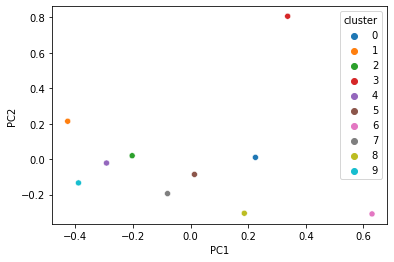

In [24]:
# this doesn't look the same, where are all the dots, which words are used in the original assignment?
# it also doesn't look as if that is all of them

pca = PCA(2)
data = pd.DataFrame(pca.fit_transform(kmeans_df), columns = ['PC1', 'PC2'])

data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=data)

In [25]:
data

,PC1,PC2,cluster
0,-0.426989,0.213749,1
1,0.186460,-0.304822,8
2,0.336907,0.805549,3
3,-0.080163,-0.194028,7
4,-0.203013,0.019612,2
5,0.225066,0.010014,0
6,0.629976,-0.308615,6
7,-0.292109,-0.021721,4
8,0.013279,-0.085945,5
9,-0.389413,-0.133791,9


In [26]:
kmeans_df

,10,abundance,abuse,acceptable,adore,age,ah,all,alone,an,...,with,within,womb,work,world,worms,worth,wrinkles,yet,youth
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.039830,0.000000,0.000000,0.000000,0.000000,0.089725,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.104773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.046510,0.089067,0.000000,0.000000,0.233768,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.186997,0.000000,0.000000,0.105312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.086895,0.000000,0.000000,0.000000,0.000000,...,0.045376,0.000000,0.102218,0.000000,0.076023,0.000000,0.000000,0.102218,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078961,0.000000,0.000000,...,0.082465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096141,0.000000,0.000000,0.163457,...,0.000000,0.000000,0.000000,0.000000,0.357513,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.098791,0.167963,0.000000,0.000000,0.000000,0.000000,...,0.087709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083982,0.083982
7,0.000000,0.000000,0.101153,0.101153,0.000000,0.000000,0.000000,0.000000,0.101153,0.000000,...,0.089806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085989,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246730,0.000000,0.082243,...,0.000000,0.082243,0.000000,0.000000,0.000000,0.000000,0.096746,0.000000,0.000000,0.082243
9,0.095221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.042270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
kmeans.labels_

array([1, 8, 3, 7, 2, 0, 6, 4, 5, 9], dtype=int32)